In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.analytic_functions import blackbody_lambda, blackbody_nu
from scipy import integrate
%matplotlib inline

"""
Define constants, which are used in necessary formulas such as
Planck constant h, speed of light in vacuum c, Boltzmann constant k.
(later I figured out, that they all defined in Scipy library at scipy.constants,
so they could be just imported straight from there)
"""

h = 6.6260695e-34
c = 3.0e+8
k = 1.380648e-23

Let's come up with solution by two defferent ways: without using of Astropy and with it.

In [6]:
#function describing Planck`s Law(wl - given wavelength, temp - given temperature)
def Planck(wl, temp):
    a = 2.0 * np.pi * h * c**2
    b = h*c/(wl * k * temp)
    intensity = a / (wl**5) * (1 / (np.exp(b) - 1.0))
    return intensity

def flux(wl, temp, r, R):
    return Planck(wl, temp) * (R / r)**2

In order to gain data to plot, let's generate range of intensities:

In [13]:
#values starting from 1 nanometer to 4 micrometer with 1 nm step
with np.errstate(all='ignore'):
    WaveLengths = np.arange(1e-9, 4e-6, 1e-9)  
    Temperatures = np.arange(3000., 8000., 1000.)
    Intensities = [Planck(WaveLengths, i) for i in Temperatures]

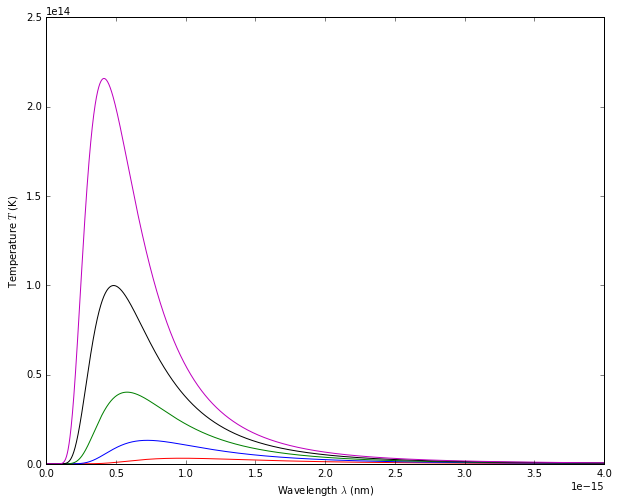

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('Wavelength $\lambda$ (nm)')
ax.set_ylabel('Temperature $T$ (K)')
for i, colour in enumerate(['r', 'b', 'g', 'k', 'm']):
    plt.plot(WaveLengths*1e-9, Intensities[i], color=colour)
    

Our reference object is Earth. Consider its magnitude equals to 0 (in relation to Vega)

Considering U, V, B, R - Ultraviolet, Violet, Blue, Red respectively, radius R of star equals to half of Solar radius and distance from Earth is 10 parsecs(in meters).

In [9]:
with np.errstate(all='ignore'):
    m_u = -2.5 * math.log10(integrate.quad(flux, 2e-9, 4e-9, (9000., 3.5e11, 30e16))[0])
    m_v = -2.5 * math.log10(integrate.quad(flux, 4e-9, 8e-9, (9000., 3.5e8, 30e16))[0])
    m_b = -2.5 * math.log10(integrate.quad(flux, 4.35e-9, 5.00e-9, (9000., 3.5e8, 30e16))[0])
    m_r = -2.5 * math.log10(integrate.quad(flux, 6.25e-9, 7.4e-9, (9000., 3.5e8, 30e16))[0])

In [10]:
print("FILTERS\nUltraviolet:", m_u, "\nViolet:",  m_v, "\nBlue:", m_b, "\nRed:", m_r)

FILTERS
Ultraviolet: 365.64422698083484 
Violet: 135.78064772577002 
Blue: 264.5237611692956 
Red: 153.13170580695981


There are function in AstroPy blackbody_lambda, which takes wavelength in angstroms(1 A = 10 nm).

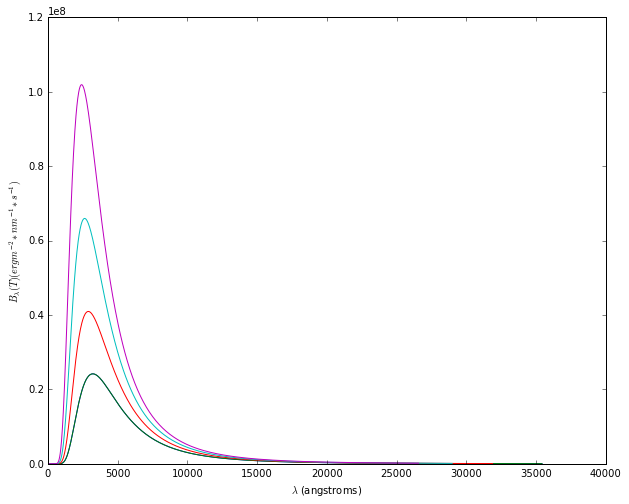

In [12]:
temperature = 9000 * u.K
waveset = np.logspace(0, np.log10(11 * (const.b_wien / temperature).to(u.AA).value), num=1000) * u.AA
with np.errstate(all='ignore'):
    flux = blackbody_lambda(waveset, temperature)

fig, ax = plt.subplots(figsize=(10, 8))

ax.get_yaxis().get_major_formatter().set_powerlimits((0, 1))
ax.set_xlabel('$\lambda$ (angstroms)')
ax.set_ylabel('$B_{\lambda}(T) (erg m^{−2}*nm^{−1}*s^{−1}) $')
for i, colour in enumerate(['r', 'b', 'g', 'k', 'm']):
    ax.plot(waveset.value, flux.value)
    temperature = (i*1000+9000) * u.K
    waveset = np.logspace(0, np.log10(11 * (const.b_wien / temperature).to(u.AA).value), num=1000) * u.AA
    with np.errstate(all='ignore'): flux = blackbody_lambda(waveset, temperature)